# Clase 1 - Red Neuronal con Numpy
<br/>

## Curso de Especialización en Inteligencia Artificial
## Analisis profundo

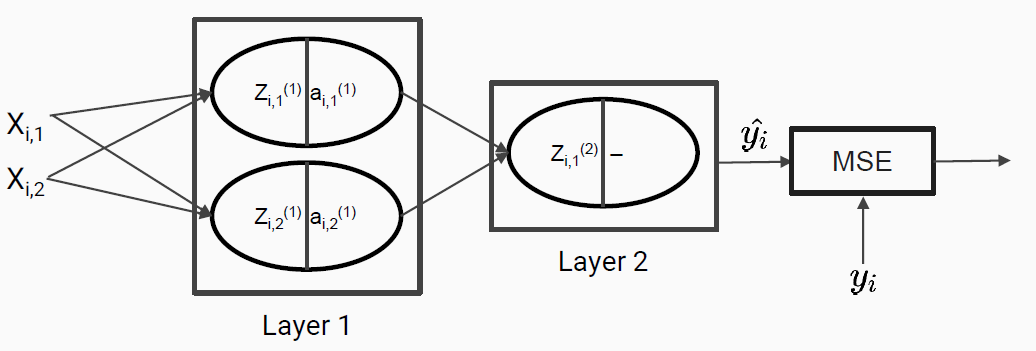

In [1]:
import os, random
import numpy as np
from matplotlib import pyplot as plt

# Set the project root directory as the current working directory
project_root = os.path.abspath(os.path.join('..', '..'))
os.chdir(project_root)

# Import my own modules
from src.nn import MLP

In [2]:
# Dataset - XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# Build the model
mlp = MLP(nin=2, nouts=[2,1], act=['sigmoid', 'linear'])
# Set parameters
loss = 'mseLoss'
epochs = 5000
lr = 0.1

##### Case A: GD
Hyperparameter (lr) learning rate

In [3]:
lr_list = np.logspace(-2, -1, 25)
loss_values = []
for lr in lr_list:
    mlp.reset()
    mlp.train_GD(X, y, loss=loss, epochs=epochs, lr=lr, out=False)
    loss_values.append(mlp._loss.value)
    y_pred = [round(yp.value, 4) for yp in mlp.forward(X)]
    print(f'lr={lr:.4g}\tloss={mlp._loss.value:.4f}\ty_pred={y_pred}')

lr=0.01	loss=0.2491	y_pred=[0.4813, 0.4804, 0.5222, 0.5161]
lr=0.01101	loss=0.2296	y_pred=[0.3595, 0.487, 0.5694, 0.5833]
lr=0.01212	loss=0.2492	y_pred=[0.498, 0.5227, 0.4783, 0.4989]
lr=0.01334	loss=0.2456	y_pred=[0.4235, 0.5167, 0.4967, 0.5623]
lr=0.01468	loss=0.2487	y_pred=[0.4466, 0.4919, 0.5126, 0.5473]
lr=0.01616	loss=0.2496	y_pred=[0.5043, 0.5258, 0.4754, 0.494]
lr=0.01778	loss=0.2500	y_pred=[0.5051, 0.501, 0.4988, 0.4948]
lr=0.01957	loss=0.2499	y_pred=[0.4851, 0.4944, 0.5058, 0.5143]
lr=0.02154	loss=0.2499	y_pred=[0.5076, 0.5063, 0.4944, 0.4927]
lr=0.02371	loss=0.2502	y_pred=[0.5102, 0.5164, 0.4829, 0.4889]
lr=0.0261	loss=0.2254	y_pred=[0.3794, 0.5123, 0.5586, 0.57]
lr=0.02873	loss=0.2395	y_pred=[0.389, 0.5328, 0.4985, 0.5805]
lr=0.03162	loss=0.1983	y_pred=[0.2146, 0.571, 0.5903, 0.6285]
lr=0.03481	loss=0.2501	y_pred=[0.5036, 0.4992, 0.5007, 0.4965]
lr=0.03831	loss=0.2499	y_pred=[0.4917, 0.491, 0.5095, 0.508]
lr=0.04217	loss=0.1660	y_pred=[0.2297, 0.5659, 0.6723, 0.5615]
lr=0.0

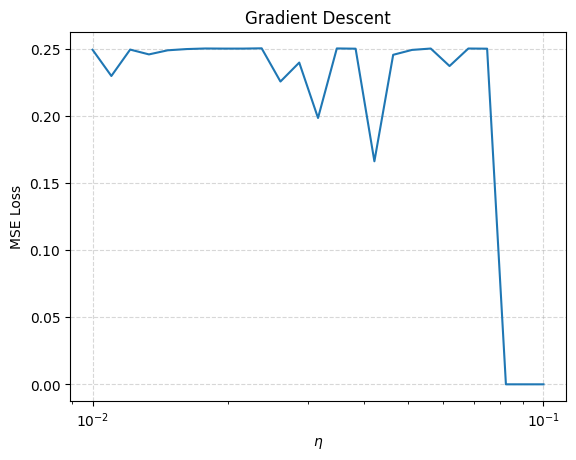

In [4]:
# Plot the loss curves for different learning rates
plt.figure()
plt.plot(lr_list, loss_values)
plt.xscale('log')
plt.xlabel('$\eta$')
plt.ylabel('MSE Loss')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.title('Gradient Descent')
plt.show()

In [5]:
lr_list = np.logspace(-3, -1, 5)
loss_values = []
for lr in lr_list:
    mlp.reset()
    history = mlp.train_GD(X, y, loss=loss, epochs=epochs, lr=lr)
    loss_values.append(history)

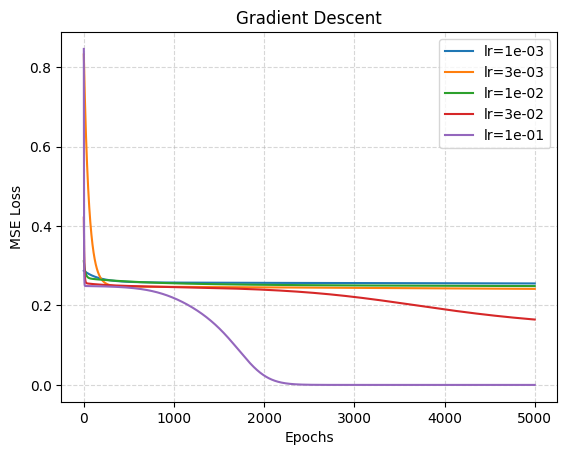

In [6]:
epoch_list = np.arange(epochs)
plt.figure()
for i, lr in enumerate(lr_list):
    plt.plot(epoch_list, loss_values[i], label=f'lr={lr:.0e}')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.title('Gradient Descent')
plt.show()

##### Case B: SGD
Hyperparameter (lr) learning rate

In [7]:
lr_list = np.logspace(-2, -1, 25)
loss_values = []
for lr in lr_list:
    mlp.reset()
    mlp.train_SGD(X, y, loss=loss, epochs=epochs, lr=lr, out=False)
    loss_values.append(mlp._loss.value)
    y_pred = [round(yp.value, 4) for yp in mlp.forward(X)]
    print(f'lr={lr:.4g}\tloss={mlp._loss.value:.4f}\ty_pred={y_pred}')

lr=0.01	loss=0.2563	y_pred=[0.4537, 0.4928, 0.5101, 0.5394]
lr=0.01101	loss=0.1879	y_pred=[0.4187, 0.4945, 0.5322, 0.5471]
lr=0.01212	loss=0.2834	y_pred=[0.5194, 0.4899, 0.5197, 0.4859]
lr=0.01334	loss=0.0004	y_pred=[0.0199, 0.9733, 0.973, 0.041]
lr=0.01468	loss=0.0001	y_pred=[0.0054, 0.9896, 0.9895, 0.0141]
lr=0.01616	loss=0.0072	y_pred=[0.0795, 0.4852, 0.8638, 0.5577]
lr=0.01778	loss=0.0000	y_pred=[0.0016, 0.9981, 0.9981, 0.0031]
lr=0.01957	loss=0.0000	y_pred=[0.0, 1.0, 1.0, 0.0]
lr=0.02154	loss=0.0000	y_pred=[0.0, 1.0, 1.0, 0.0]
lr=0.02371	loss=0.0000	y_pred=[0.0, 1.0, 1.0, 0.0]
lr=0.0261	loss=0.0000	y_pred=[0.0, 1.0, 1.0, 0.0]
lr=0.02873	loss=0.0000	y_pred=[0.0, 1.0, 1.0, 0.0]
lr=0.03162	loss=0.0000	y_pred=[0.0, 1.0, 1.0, 0.0]
lr=0.03481	loss=0.0000	y_pred=[0.0, 1.0, 1.0, 0.0]
lr=0.03831	loss=0.3523	y_pred=[0.0063, 0.9607, 0.4789, 0.504]
lr=0.04217	loss=0.0000	y_pred=[0.0, 1.0, 1.0, 0.0]
lr=0.04642	loss=0.0003	y_pred=[0.0152, 0.5007, 1.0053, 0.5109]
lr=0.05109	loss=0.0000	y_pred=[0

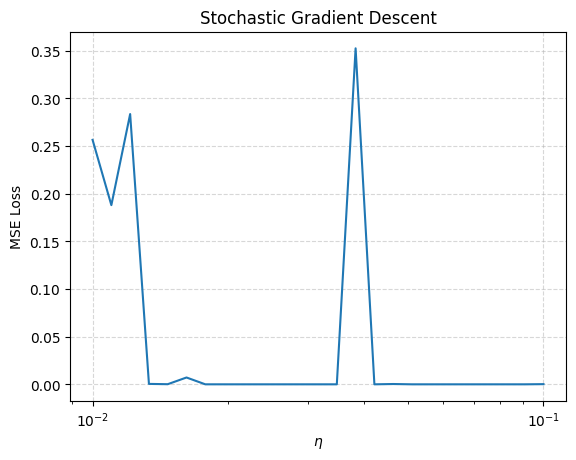

In [8]:
# Plot the loss curves for different learning rates
plt.figure()
plt.plot(lr_list, loss_values)
plt.xscale('log')
plt.xlabel('$\eta$')
plt.ylabel('MSE Loss')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.title('Stochastic Gradient Descent')
plt.show()

In [9]:
lr_list = np.logspace(-3, -1, 5)
loss_values = []
for lr in lr_list:
    mlp.reset()
    history = mlp.train_SGD(X, y, loss=loss, epochs=epochs, lr=lr)
    loss_values.append(history)

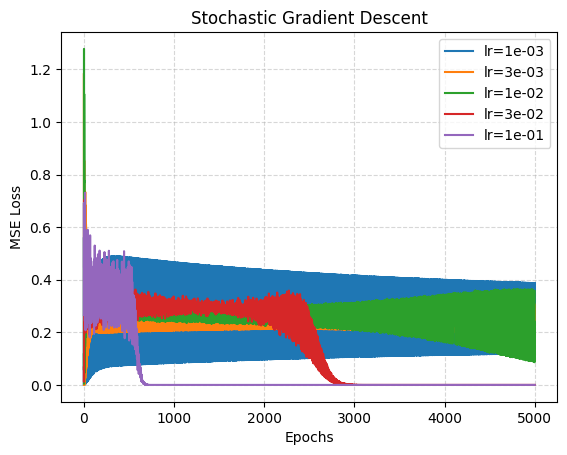

In [10]:
epoch_list = np.arange(epochs)
plt.figure()
for i, lr in enumerate(lr_list):
    plt.plot(epoch_list, loss_values[i], label=f'lr={lr:.0e}')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.title('Stochastic Gradient Descent')
plt.show()